In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [54]:
import os

In [55]:
os.chdir('/kaggle/input/car-fronts-image-dataset-from-dvm-car-dataset/car_fronts_dataset/')

In [56]:
os.getcwd()

'/kaggle/input/car-fronts-image-dataset-from-dvm-car-dataset/car_fronts_dataset'

In [57]:
train_dir='train'
val_dir='validation'
test_dir='test'

In [58]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [59]:

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    channel_shift_range=30.0,
    zca_whitening=True,
    featurewise_center=True,
    featurewise_std_normalization=True,
)

val_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    channel_shift_range=30.0,
    zca_whitening=True,
    featurewise_center=True,
    featurewise_std_normalization=True,
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    channel_shift_range=30.0,
    zca_whitening=True,
    featurewise_center=True,
    featurewise_std_normalization=True,
)


In [60]:
train=train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    target_size=(160,160),
    class_mode='categorical'
)
test=test_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    target_size=(160,160),
    class_mode='categorical',
    shuffle=False
)

val=val_datagen.flow_from_directory(
    val_dir,
    batch_size=32,
    target_size=(160,160),
    class_mode='categorical'
)


Found 49418 images belonging to 54 classes.
Found 6179 images belonging to 54 classes.
Found 6206 images belonging to 54 classes.


In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten,BatchNormalization


In [22]:
strategy=tf.distribute.MirroredStrategy()
with strategy.scope():
    model=Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(224,224,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
              
    model.add(Conv2D(128,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
              
    
    model.add(Conv2D(128,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    
    
    model.add(Flatten())
    
    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(54,activation='softmax'))
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 54)             │        13,878 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,828,214 (37.49 MB)

 Trainable params: 9,825,974 (37.48 MB)

 Non-trainable params: 2,240 (8.75 KB)

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stopping=EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

In [26]:
history=model.fit(
    train,
    epochs=15,
    validation_data=val,
    callbacks=[early_stopping]
)

Epoch 1/15

1545/1545 ━━━━━━━━━━━━━━━━━━━━ 1019s 649ms/step - accuracy: 0.1071 - loss: 4.0536 - val_accuracy: 0.1792 - val_loss: 3.0595

Epoch 2/15

1545/1545 ━━━━━━━━━━━━━━━━━━━━ 779s 502ms/step - accuracy: 0.2656 - loss: 2.7296 - val_accuracy: 0.3252 - val_loss: 2.5945

Epoch 3/15

1545/1545 ━━━━━━━━━━━━━━━━━━━━ 812s 524ms/step - accuracy: 0.4008 - loss: 2.2174 - val_accuracy: 0.5234 - val_loss: 1.7264

Epoch 4/15

1545/1545 ━━━━━━━━━━━━━━━━━━━━ 894s 576ms/step - accuracy: 0.5031 - loss: 1.8454 - val_accuracy: 0.5778 - val_loss: 1.5193

Epoch 5/15

1545/1545 ━━━━━━━━━━━━━━━━━━━━ 890s 574ms/step - accuracy: 0.5706 - loss: 1.5906 - val_accuracy: 0.6416 - val_loss: 1.3005

Epoch 6/15

1545/1545 ━━━━━━━━━━━━━━━━━━━━ 887s 572ms/step - accuracy: 0.6284 - loss: 1.3925 - val_accuracy: 0.6942 - val_loss: 1.1500

Epoch 7/15

1545/1545 ━━━━━━━━━━━━━━━━━━━━ 881s 568ms/step - accuracy: 0.6780 - loss: 1.2284 - val_accuracy: 0.7071 - val_loss: 1.1060

Epoch 8/15

1545/1545 ━━━━━━━━━━━━━━━━━━━━ 890s

In [27]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


194/194 ━━━━━━━━━━━━━━━━━━━━ 138s 714ms/step - accuracy: 0.9076 - loss: 0.3498

Test Loss: 0.4811

Test Accuracy: 87.70%


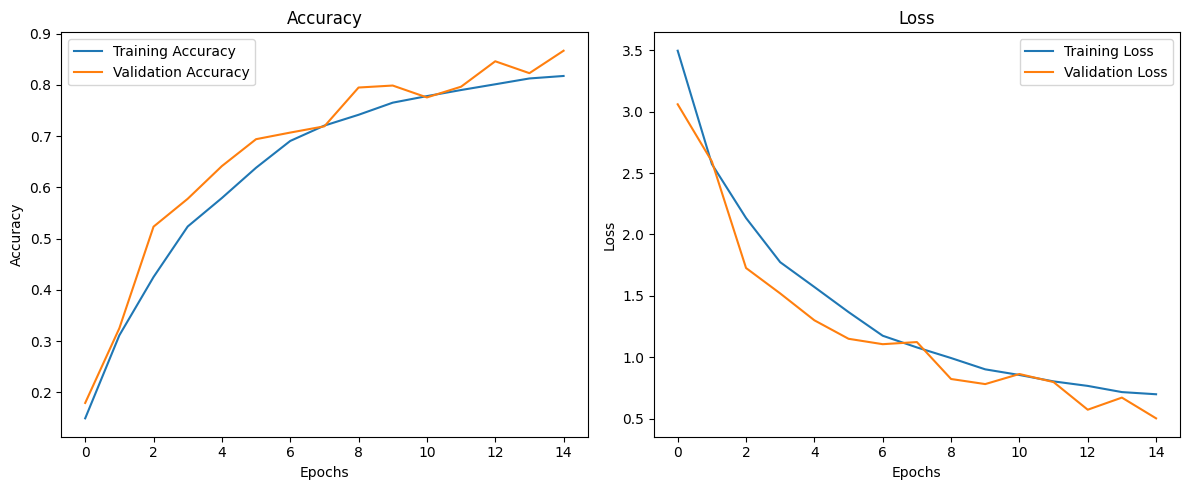

In [28]:
import matplotlib.pyplot as plt

# Plotting Training and Validation Accuracy
plt.figure(figsize=(12, 5))

# Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:1286: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

  warnings.warn(


194/194 ━━━━━━━━━━━━━━━━━━━━ 95s 487ms/step


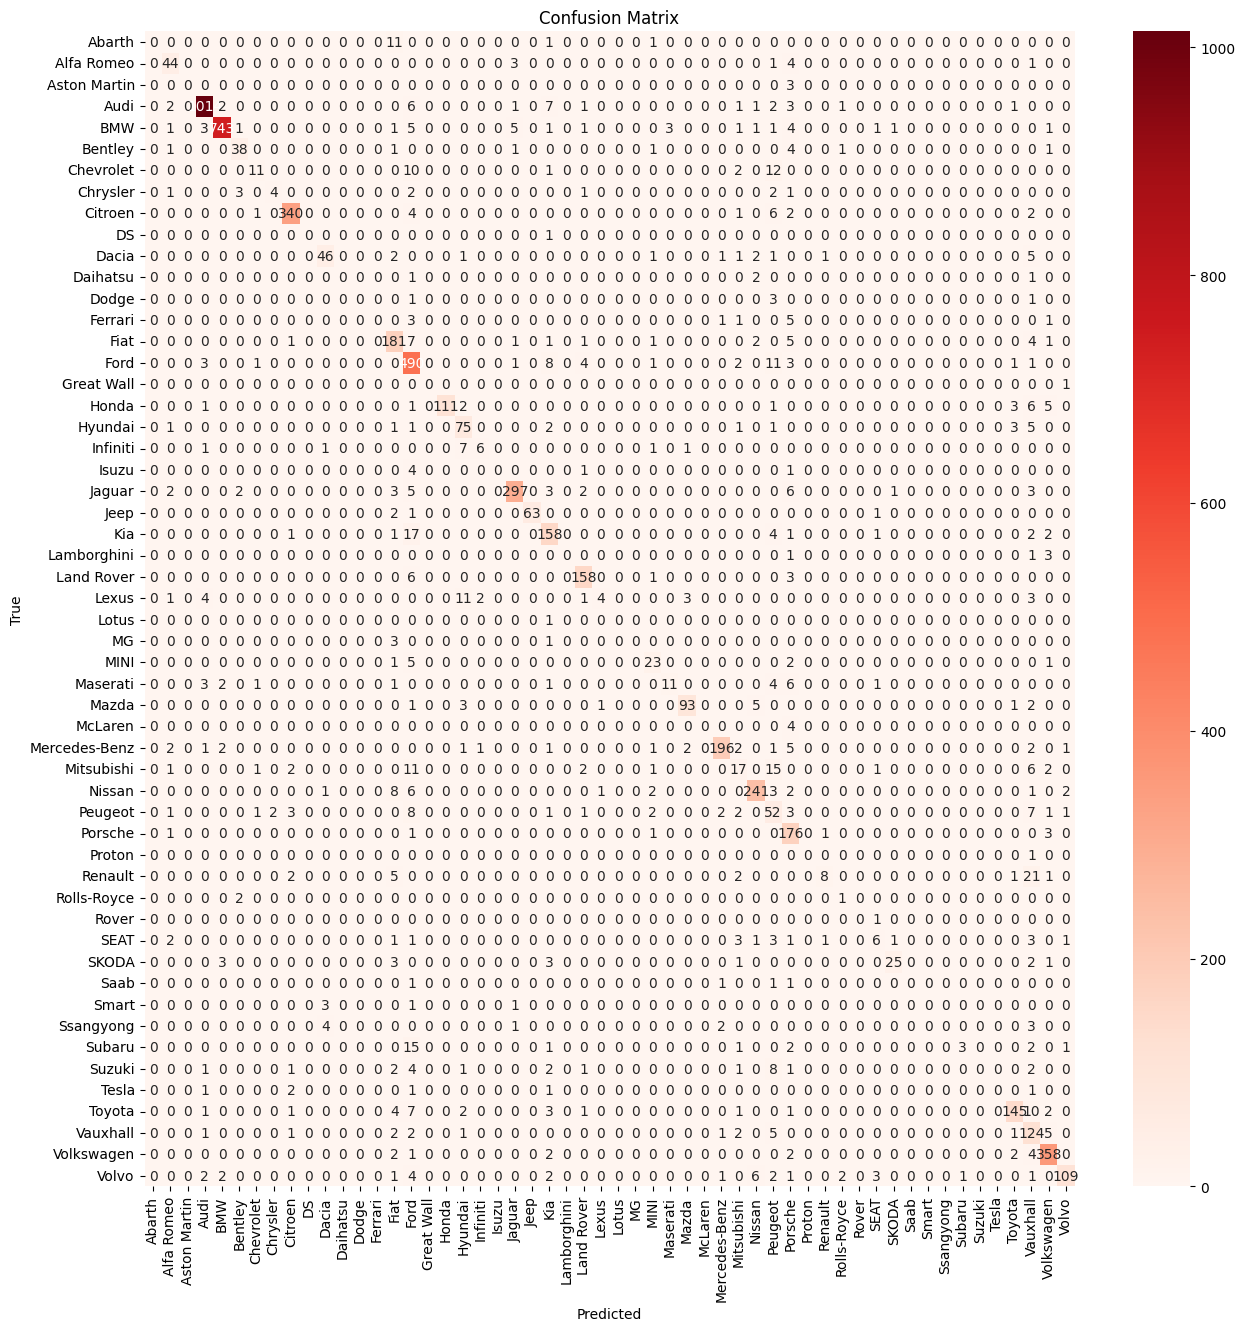

               precision    recall  f1-score   support



       Abarth       0.00      0.00      0.00        13

   Alfa Romeo       0.73      0.83      0.78        53

 Aston Martin       0.00      0.00      0.00         3

         Audi       0.98      0.97      0.98      1042

          BMW       0.99      0.96      0.97       774

      Bentley       0.83      0.79      0.81        48

    Chevrolet       0.69      0.31      0.42        36

     Chrysler       0.67      0.29      0.40        14

      Citroen       0.96      0.96      0.96       356

           DS       0.00      0.00      0.00         1

        Dacia       0.84      0.75      0.79        61

     Daihatsu       0.00      0.00      0.00         4

        Dodge       0.00      0.00      0.00         5

      Ferrari       0.00      0.00      0.00        11

         Fiat       0.77      0.88      0.82       205

         Ford       0.77      0.93      0.85       526

   Great Wall       0.00      0.00      0.00  

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the classes for the test data
Y_pred = model.predict(test)
y_pred = np.argmax(Y_pred, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(test.classes, y_pred)

# Plot the confusion matrix in red color
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=test.class_indices.keys(), yticklabels=test.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(test.classes, y_pred, target_names=test.class_indices.keys()))


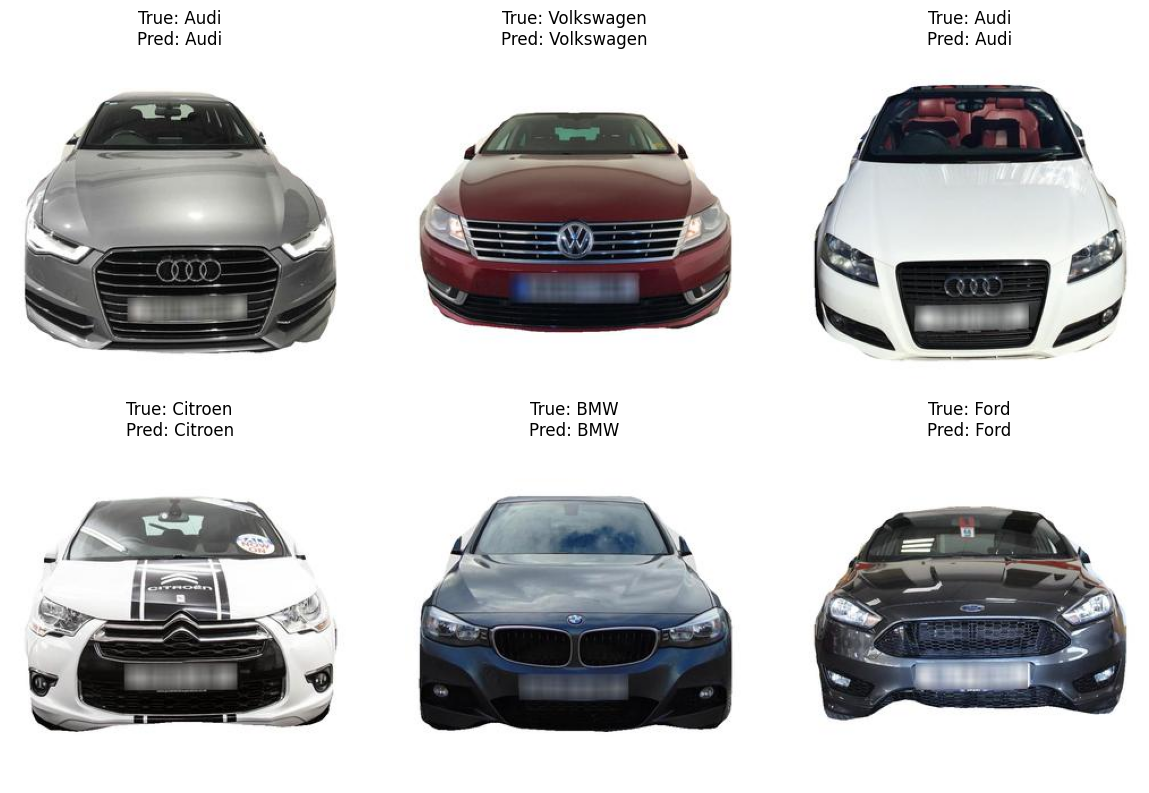

In [41]:
import random
import matplotlib.pyplot as plt

# Get 6 random indices from the test dataset
random_indices = random.sample(range(len(test.filenames)), 6)

# Prepare to display the images
plt.figure(figsize=(12, 8))

for i, index in enumerate(random_indices):
    # Load the image
    img_path = os.path.join(test_dir, test.filenames[index])
    img = plt.imread(img_path)
    
    # Get the actual label
    actual_label = test.classes[index]
    actual_label_name = list(test.class_indices.keys())[actual_label]
    
    # Get the model's prediction for this image
    model_prediction = Y_pred[index]
    predicted_label = np.argmax(model_prediction)
    predicted_label_name = list(test.class_indices.keys())[predicted_label]

    # Display the image
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f'True: {actual_label_name}\nPred: {predicted_label_name}')
    plt.axis('off')

plt.tight_layout()
plt.show()
